In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import torch.nn.functional as F
from torch import nn, optim

In [2]:
def current_example(example_number, data_set):
    current_datafile = open(data_set + '.csv', 'r')
    current_dataset = current_datafile.readlines()
    current_datafile.close()
    
    inputs = np.zeros((len(example_number), 32, 32, 1))
    targets = np.zeros((len(example_number), 1))
    index = 0
    
    for each_number in example_number:
        each_set = current_dataset[each_number]
        all_values = each_set.split(',')

        #the first value is the label
        correct_label = int(all_values[0])

        #Normalize the pixel values in range of 0.01 - 1 
        inputs[index] = np.asarray(all_values[1:], dtype = np.float32).reshape(32, 32, 1) / 255 * 0.99 + 0.01 
        targets[index] = int(all_values[0])
        index += 1
            
    return(inputs, targets)


In [3]:
#prepare training and test data
#try to get as random as possible

seed = np.random.randint(1, 17000)
np.random.seed(seed)
num_exmp = np.linspace(0, 16999, 17000, dtype = np.int32)
np.random.shuffle(num_exmp)
(x_train, y_train) = current_example(num_exmp, 'train') 

num_exmp = np.linspace(0, 2999, 3000, dtype = np.int32)
x_test, y_test = current_example(num_exmp, 'test')


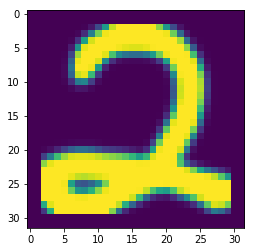

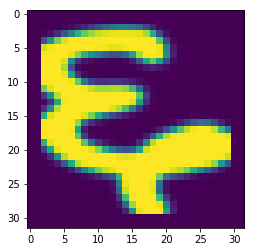

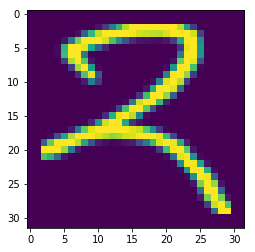

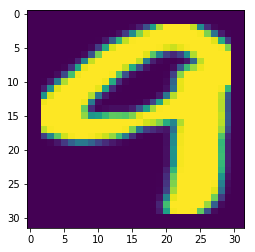

In [4]:
#preview some training examples
for i in range(4):
    plt.imshow(x_train[i].reshape(32, 32))
    plt.show()

In [5]:
model = nn.Sequential(nn.Linear(1024, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                     nn.Linear(256, 46))


In [6]:
#Get data one example at a time

# x_train = x_train.reshape(x_train.shape[0], 1024)
# y_train = y_train.reshape(y_train.shape[0])

images, labels = next(iter(x_train)), next(iter(y_train))
images = th.Tensor(images.reshape(1, 1024))

# print(labels)
# zeros = np.zeros(46)
# zeros[int(labels)] = 1.0
# labels = th.Tensor(np.asarray(zeros.reshape(1, 46))).long()

In [7]:
# Define the loss
criterion = nn.CrossEntropyLoss()

# Flatten images
images = images.view(images.shape[0], -1)

# Forward pass, get our log-probabilities
logps = model(images)

# print(len(logps), len(labels))
# labels = labels.view(labels.shape[0], -1)
# print(logps.shape, labels.shape)
# Calculate the loss with the logps and the labels

loss = criterion(logps, th.Tensor(labels).long())

print(loss)

tensor(3.9392, grad_fn=<NllLossBackward>)


In [8]:
criterion = nn.NLLLoss()
loss = criterion(logps, th.Tensor(labels).long())

In [9]:
loss

tensor(0.1065, grad_fn=<NllLossBackward>)

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [13]:
criterion = nn.NLLLoss()
epochs = 10

lossv = []

for epoch in range(epochs):
    running_loss = 0
    for i in range(len(x_train)):

        image = th.Tensor(x_train[1].reshape(1, 1024))
        image = image.view(image.shape[0], -1)
        
        label = y_train[i]
        logps = model(image) 
        loss = criterion(logps, th.Tensor(label).long())
        
        
#         print(logps, label)
        
        
#         print(logps)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        lossv.append(loss.item())
        
        
    print(f"Iteration {epoch}", f"Loss: {running_loss / len(x_train)}")


Iteration 0 Loss: nan
Iteration 1 Loss: nan
Iteration 2 Loss: nan
Iteration 3 Loss: nan


KeyboardInterrupt: 

In [ ]:
logps

In [ ]:
#predict

for i in range (4):
    index = np.random.randint(0, 1000)
    
    predict = model(th.Tensor(x_train[index].reshape(1, 1024)))
    predict = th.argmax(predict.view(predict[0].shape[0], -1))
    
    plt.imshow(x_train[index].reshape(32, 32))
    title = f"Predicted: {predict} Actual:  {int(y_train[index])}"
    plt.title(title)
    plt.show()

In [ ]:
#update cuda driver

In [ ]:
def dataset(file):
    current_datafile = open(file, 'r')
    current_dataset = current_datafile.readlines()
    current_datafile.close()

    datasets = np.zeros([len(current_dataset), 1025])
    for i in range(len(current_dataset)):
        example = current_dataset[i].split(',')
        example = np.asarray(example, dtype=np.float32)
        datasets[i] = example
    return datasets

In [ ]:
trainloader = th.utils.data.DataLoader(dataset('train.csv'), shuffle = True, batch_size = 32)
testloader = th.utils.data.DataLoader(dataset('train.csv'), shuffle = True, batch_size = 32)

In [ ]:
model = nn.Sequential(nn.Linear(1024, 512),
                      nn.ReLU(),
                      nn.Linear(512, 256),
                      nn.ReLU(),
                     nn.Linear(256, 46))


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
for example in imageloader:
    label = example[0][0]
    image = th.DoubleTensor(example[0][1:])
    print(image[0])
    
    logps = model(image) 
    loss = criterion(logps, label)


#         print(logps, label)


    print(logps)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    lossv.append(loss.item())


print(f"Iteration {epoch}", f"Loss: {running_loss / len(x_train)}")

